# EfficientNet Implementation for MURA: Hand, Wrist and Fingers

## Imports

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import tensorflow as tf

import pandas as pd
import matplotlib.pyplot as pyplot
import os

dataset_path = os.listdir('/content/drive/Othercomputers/macbookpro/MURA-v1.1')

print(dataset_path)

['train_image_paths.csv', 'train_labeled_studies.csv', 'valid_labeled_studies.csv', 'valid_image_paths.csv', 'train', 'valid']


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/TFG/mura_df.csv')
df.head()

,path,bodypart,abnormality
0,/Users/felipesanmartin/Study/TFG/data/MURA-v1....,XR_SHOULDER,1
1,/Users/felipesanmartin/Study/TFG/data/MURA-v1....,XR_SHOULDER,1
2,/Users/felipesanmartin/Study/TFG/data/MURA-v1....,XR_SHOULDER,1
3,/Users/felipesanmartin/Study/TFG/data/MURA-v1....,XR_SHOULDER,1
4,/Users/felipesanmartin/Study/TFG/data/MURA-v1....,XR_SHOULDER,1


In [ ]:
df['abnormality'].value_counts()

0    23602
1    16403
Name: abnormality, dtype: int64

In [ ]:
df['bodypart'].value_counts()

XR_WRIST       10411
XR_SHOULDER     8942
XR_HAND         6003
XR_FINGER       5567
XR_ELBOW        5396
XR_FOREARM      2126
XR_HUMERUS      1560
Name: bodypart, dtype: int64

In [ ]:
# Changing the path column to match the Google Drive directories
for i in range(len(df['path'])):
  df['path'][i] = df['path'][i].replace("/Users/felipesanmartin/Study/TFG/data", "/content/drive/Othercomputers/macbookpro")
df

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,path,bodypart,abnormality
0,/content/drive/Othercomputers/macbookpro/MURA-...,XR_SHOULDER,1
1,/content/drive/Othercomputers/macbookpro/MURA-...,XR_SHOULDER,1
2,/content/drive/Othercomputers/macbookpro/MURA-...,XR_SHOULDER,1
3,/content/drive/Othercomputers/macbookpro/MURA-...,XR_SHOULDER,1
4,/content/drive/Othercomputers/macbookpro/MURA-...,XR_SHOULDER,1
...,...,...,...
40000,/content/drive/Othercomputers/macbookpro/MURA-...,XR_FINGER,0
40001,/content/drive/Othercomputers/macbookpro/MURA-...,XR_FINGER,0
40002,/content/drive/Othercomputers/macbookpro/MURA-...,XR_FINGER,0
40003,/content/drive/Othercomputers/macbookpro/MURA-...,XR_FINGER,0


In [ ]:

df.path[0].split("/")

['',
 'content',
 'drive',
 'Othercomputers',
 'macbookpro',
 'MURA-v1.1',
 'train',
 'XR_SHOULDER',
 'patient00001',
 'study1_positive',
 'image1.png']

In [ ]:
def get_study(path):
  study = str(path.split("/")[8]) + "/" + str(path.split("/")[9])
  return study

In [ ]:
df["study"] = [get_study(i) for i in df.path]
df.sort_values(by = "study", ignore_index = True, inplace = True)
df

,path,bodypart,abnormality,study
0,/content/drive/Othercomputers/macbookpro/MURA-...,XR_SHOULDER,1,patient00001/study1_positive
1,/content/drive/Othercomputers/macbookpro/MURA-...,XR_SHOULDER,1,patient00001/study1_positive
2,/content/drive/Othercomputers/macbookpro/MURA-...,XR_SHOULDER,1,patient00001/study1_positive
3,/content/drive/Othercomputers/macbookpro/MURA-...,XR_SHOULDER,1,patient00002/study1_positive
4,/content/drive/Othercomputers/macbookpro/MURA-...,XR_SHOULDER,1,patient00002/study1_positive
...,...,...,...,...
40000,/content/drive/Othercomputers/macbookpro/MURA-...,XR_FINGER,0,patient11966/study1_negative
40001,/content/drive/Othercomputers/macbookpro/MURA-...,XR_FINGER,0,patient11967/study1_negative
40002,/content/drive/Othercomputers/macbookpro/MURA-...,XR_FINGER,0,patient11967/study1_negative
40003,/content/drive/Othercomputers/macbookpro/MURA-...,XR_FINGER,0,patient11967/study1_negative


### Only training on: Finger, Hand and Wrist Images

In [ ]:
df_hand = df[(df["bodypart"] == "XR_HAND") + (df["bodypart"] == "XR_FINGER") + (df["bodypart"] == "XR_WRIST")]
df_hand

,path,bodypart,abnormality,study
16,/content/drive/Othercomputers/macbookpro/MURA-...,XR_WRIST,1,patient00006/study1_positive
17,/content/drive/Othercomputers/macbookpro/MURA-...,XR_WRIST,1,patient00006/study1_positive
18,/content/drive/Othercomputers/macbookpro/MURA-...,XR_WRIST,1,patient00006/study1_positive
27,/content/drive/Othercomputers/macbookpro/MURA-...,XR_HAND,1,patient00008/study1_positive
28,/content/drive/Othercomputers/macbookpro/MURA-...,XR_HAND,1,patient00008/study1_positive
...,...,...,...,...
40000,/content/drive/Othercomputers/macbookpro/MURA-...,XR_FINGER,0,patient11966/study1_negative
40001,/content/drive/Othercomputers/macbookpro/MURA-...,XR_FINGER,0,patient11967/study1_negative
40002,/content/drive/Othercomputers/macbookpro/MURA-...,XR_FINGER,0,patient11967/study1_negative
40003,/content/drive/Othercomputers/macbookpro/MURA-...,XR_FINGER,0,patient11967/study1_negative


In [ ]:
df_hand["bodypart"].value_counts()

XR_WRIST     10411
XR_HAND       6003
XR_FINGER     5567
Name: bodypart, dtype: int64

### Data preprocessing

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

NUM_IMAGES = len(df_hand) # Only getting 10000 images to test
# df_hand = shuffle(df_hand, random_state = 42)
X = list(df_hand.path)
y = list(df_hand.abnormality)

X_train, X_val, y_train, y_val = train_test_split(X,
                                                  y,
                                                  test_size = 0.2,
                                                  random_state = 42,
                                                  shuffle = False)

len(X_train), len(y_train), len(X_val), len(y_val)

(17584, 17584, 4397, 4397)

In [ ]:
IMG_SIZE = 480

def preprocess_image(path, label):
  # Reading image file
  img = tf.io.read_file(path)
  # Convert string to a 3D uint8 tensor
  img = tf.io.decode_png(img, channels = 3)
  # Convert color channel values from 0 - 255 values to 0 - 1 values
  img = tf.image.convert_image_dtype(img, tf.float32)
  # Resize the image to the desired size
  return tf.image.resize(img, [IMG_SIZE, IMG_SIZE]), label

In [ ]:
BATCH_SIZE = 64

def create_data(x, y, batch_size = BATCH_SIZE, val_data = False):
  if val_data: # Val data, no need to shuffle it
    data = tf.data.Dataset.from_tensor_slices((tf.constant(x),
                                              tf.constant(y)))
    data = data.map(preprocess_image)
    data_batches = data.batch(BATCH_SIZE)
    return data_batches
  else: # Train data
    data = tf.data.Dataset.from_tensor_slices((tf.constant(x), # paths
                                               tf.constant(y))) # labels
    data = data.shuffle(buffer_size = len(x), seed = 42)
    data = data.map(preprocess_image)
    data_batches = data.batch(BATCH_SIZE)
    return data_batches

In [ ]:
train_ds = create_data(X_train, y_train)
val_ds = create_data(X_val, y_val, val_data = True)

In [ ]:
train_ds, val_ds

(<BatchDataset element_spec=(TensorSpec(shape=(None, 480, 480, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>,
 <BatchDataset element_spec=(TensorSpec(shape=(None, 480, 480, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>)

In [ ]:
import matplotlib.pyplot as plt

# Create a function for viewing images in a data batch
def show_25_images(images, labels):
  """
  Displays 25 images from a data batch.
  """
  # Setup the figure
  plt.figure(figsize=(12, 12))
  # Loop through 25 (for displaying 25 images)
  for i in range(25):
    # Create subplots (5 rows, 5 columns)
    ax = plt.subplot(5, 5, i+1)
    # Display an image
    plt.imshow(images[i])
    # Add the image label as the title
    plt.title(labels[i])
    # Turn gird lines off
    plt.axis("off")

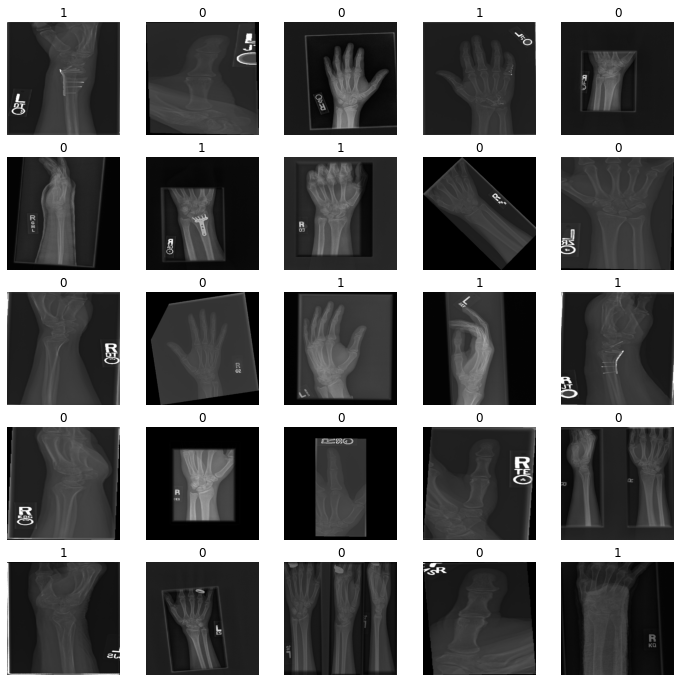

In [ ]:
train_images, train_labels = next(train_ds.as_numpy_iterator())
show_25_images(train_images, train_labels)

### Configuring the dataset for performance

In [ ]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds.cache().shuffle(1000).prefetch(buffer_size = AUTOTUNE)
val_ds.cache().prefetch(buffer_size = AUTOTUNE)

<PrefetchDataset element_spec=(TensorSpec(shape=(None, 480, 480, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

### Creating model using TFHub EffNet v2 M

In [ ]:
import tensorflow_hub as hub

model_URL = "https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet1k_l/classification/2"
num_classes = 1
INPUT_SHAPE = [None, 480, 480, 3]

model = tf.keras.Sequential([
    hub.KerasLayer(model_URL),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(units = 1,
                          activation = "sigmoid")
])

In [ ]:
model.compile(optimizer = tf.keras.optimizers.Adam(0.001),
              loss = tf.keras.losses.BinaryCrossentropy(),
              metrics = ['accuracy'])
model.build(INPUT_SHAPE)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1000)              119027848 
                                                                 
 dropout (Dropout)           (None, 1000)              0         
                                                                 
 dense (Dense)               (None, 1)                 1001      
                                                                 
Total params: 119,028,849
Trainable params: 1,001
Non-trainable params: 119,027,848
_________________________________________________________________


In [ ]:
%load_ext tensorboard

In [ ]:
import datetime

# Create function to build TensorBoard callback
def create_tensorboard_callback():
  logdir = os.path.join("drive/MyDrive/TFG/logs",
                        datetime.datetime.now().strftime("%Y%m%d-%H%M&S"))
  return tf.keras.callbacks.TensorBoard(logdir)

In [ ]:
early_stopping = tf.keras.callbacks.EarlyStopping(monitor="val_accuracy",
                                                  patience = 6) # stops after 6 rounds of no improvements

In [ ]:
# Callbacks to save the epoch with best val_accuracy
checkpoint_filepath = "/content/drive/MyDrive/TFG/models/checkpoints"

model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=True,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)

### Training the model on all the images

In [ ]:
tensorboard = create_tensorboard_callback()

epochs = 100
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs = epochs,  
    verbose = 1,
    callbacks = [tensorboard, early_stopping, model_checkpoint_callback]
)

Epoch 1/100
275/275 [==============================] - 2269s 8s/step - loss: 0.5888 - accuracy: 0.6879 - val_loss: 0.5753 - val_accuracy: 0.7180
Epoch 2/100
275/275 [==============================] - 534s 2s/step - loss: 0.5344 - accuracy: 0.7322 - val_loss: 0.5711 - val_accuracy: 0.7223
Epoch 3/100
275/275 [==============================] - 530s 2s/step - loss: 0.5200 - accuracy: 0.7420 - val_loss: 0.5990 - val_accuracy: 0.6816
Epoch 4/100
275/275 [==============================] - 533s 2s/step - loss: 0.5128 - accuracy: 0.7479 - val_loss: 0.5352 - val_accuracy: 0.7642
Epoch 5/100
275/275 [==============================] - 530s 2s/step - loss: 0.5098 - accuracy: 0.7510 - val_loss: 0.5699 - val_accuracy: 0.7171
Epoch 6/100
275/275 [==============================] - 534s 2s/step - loss: 0.5033 - accuracy: 0.7576 - val_loss: 0.5037 - val_accuracy: 0.7937
Epoch 7/100
275/275 [==============================] - 530s 2s/step - loss: 0.5022 - accuracy: 0.7585 - val_loss: 0.6176 - val_accuracy

In [ ]:
model.load_weights(checkpoint_filepath)
model.save("/content/drive/MyDrive/TFG/models/mura_effnet_hand.h5")

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = 9
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

## Model Evaluation

In [ ]:
from sklearn.metrics import classification_report, cohen_kappa_score, confusion_matrix

pred_batch = model.predict(val_ds)
pred = []
for p in pred_batch:
  if(p>0.5):
    pred += [1]
  else:
    pred += [0]
kap = cohen_kappa_score(y_val, pred)
print("Cohen kappa score is: " + str(kap))

Cohen kappa score is: 0.5011471492649713


In [ ]:
# Classification report
print("Classification report")
print(classification_report(y_val, pred, target_names = ["0", "1"]))

Classification report
              precision    recall  f1-score   support

           0       0.77      0.93      0.85      2778
           1       0.83      0.53      0.64      1619

    accuracy                           0.79      4397
   macro avg       0.80      0.73      0.75      4397
weighted avg       0.79      0.79      0.77      4397



In [ ]:
# Prediction error
error = np.sum(np.not_equal(pred, y_val))/len(y_val)
print("Prediction error: " + str(error))

Prediction error: 0.21469183534227881


<function matplotlib.pyplot.show(*args, **kw)>

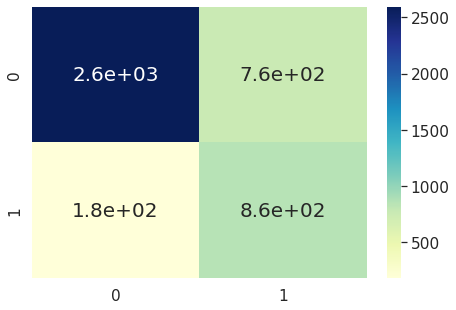

In [ ]:
import seaborn as sn

# Confusion matrix
cm = confusion_matrix(pred, y_val)
plt.figure(figsize = (7.5, 5))
sn.set(font_scale = 1.4)
sn.heatmap(cm, annot = True, annot_kws = {"size": 20}, cmap = "YlGnBu")
plt.show

In [ ]:
predictions = model.predict(val_ds, verbose = 1)
predictions

69/69 [==============================] - 108s 2s/step


array([[0.15990013],
       [0.40404502],
       [0.0716437 ],
       ...,
       [0.9600809 ],
       [0.9525826 ],
       [0.18308328]], dtype=float32)

In [ ]:
def get_pred_label(prob):
  if prob > 0.5:
    prediction = 1
  if prob <= 0.5:
    prediction = 0
  return prediction

In [ ]:
# Unbatchify data
def unbatchify(data):
  images = []
  labels = []
  # Loop through unbatched data
  for image, label in data.unbatch().as_numpy_iterator():
    images.append(image)
    labels.append(label)
  return images, labels

# Unbatch val data
val_images, val_labels = unbatchify(val_ds)
val_images[0], val_labels[0]

(array([[[0.03137255, 0.03137255, 0.03137255],
         [0.03396691, 0.03396691, 0.03396691],
         [0.03677424, 0.03677424, 0.03677424],
         ...,
         [0.03889441, 0.03889441, 0.03889441],
         [0.03658002, 0.03658002, 0.03658002],
         [0.03908497, 0.03908497, 0.03908497]],
 
        [[0.03176471, 0.03176471, 0.03176471],
         [0.03203309, 0.03203309, 0.03203309],
         [0.02695262, 0.02695262, 0.02695262],
         ...,
         [0.03487943, 0.03487943, 0.03487943],
         [0.0372966 , 0.0372966 , 0.0372966 ],
         [0.03568628, 0.03568628, 0.03568628]],
 
        [[0.03464052, 0.03464052, 0.03464052],
         [0.03732435, 0.03732435, 0.03732435],
         [0.03639366, 0.03639366, 0.03639366],
         ...,
         [0.02968752, 0.02968752, 0.02968752],
         [0.03185242, 0.03185242, 0.03185242],
         [0.03856209, 0.03856209, 0.03856209]],
 
        ...,
 
        [[0.03267942, 0.03267942, 0.03267942],
         [0.03178503, 0.03178503, 0.03178

In [ ]:
def plot_pred(prediction_probabilities, labels, images, n = 1):
  pred_prob, true_label, image = prediction_probabilities[n], labels[n], images[n]

  # Get pred label
  pred_label = get_pred_label(pred_prob)

  # Plot image and remove ticks
  plt.imshow(image)
  plt.xticks([])
  plt.yticks([])

  # Change color of title depending on if the prediction is right or wrong
  if pred_label == true_label:
    color = "green"
  else:
    color = "red"
  plt.title("{} {:2.0f}% ({})".format(pred_label,
                                      np.max(pred_prob)*100,
                                      true_label),
                                      color=color)

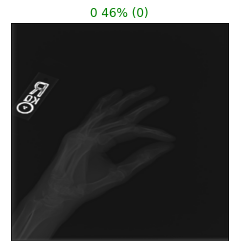

In [ ]:
plot_pred(prediction_probabilities = predictions, 
          labels = val_labels,
          images = val_images,
          n = 10)

In [ ]:
def plot_pred_conf(prediction_probabilities, labels, n=1):
  """
  Plots the top 10 highest prediction confidences along with
  the truth label for sample n.
  """
  pred_prob, true_label = prediction_probabilities[n], labels[n]

  # Get the predicted label
  pred_label = get_pred_label(pred_prob)

  # Find the top 10 prediction confidence indexes
  top_10_pred_indexes = pred_prob.argsort()[-10:][::-1]
  # Find the top 10 prediction confidence values
  top_10_pred_values = pred_prob[top_10_pred_indexes]
  # Find the top 10 prediction labels
  top_10_pred_labels = unique_breeds[top_10_pred_indexes]

  # Setup plot
  top_plot = plt.bar(np.arange(len(top_10_pred_labels)), 
                     top_10_pred_values, 
                     color="grey")
  plt.xticks(np.arange(len(top_10_pred_labels)),
             labels=top_10_pred_labels,
             rotation="vertical")

  # Change color of true label
  if np.isin(true_label, top_10_pred_labels):
    top_plot[np.argmax(top_10_pred_labels == true_label)].set_color("green")
  else:
    pass

In [ ]:
# Let's check a few predictions and their different values
i_multiplier = 0
num_rows = 4
num_cols = 4
num_images = num_rows*num_cols
plt.figure(figsize=(10, 10))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_pred(prediction_probabilities=predictions,
            labels=val_labels,
            images=val_images,
            n=i+i_multiplier)
plt.tight_layout(h_pad=1.0)
plt.show()

## Using loaded model

In [ ]:
import tensorflow_hub as hub
model = tf.keras.models.load_model("/content/drive/MyDrive/TFG/models/mura_effnet_hand.h5", custom_objects={'KerasLayer': hub.KerasLayer})

In [ ]:
X_val[:5], y_val[:5]

(['/content/drive/Othercomputers/macbookpro/MURA-v1.1/train/XR_HAND/patient10166/study1_negative/image1.png',
  '/content/drive/Othercomputers/macbookpro/MURA-v1.1/train/XR_HAND/patient10166/study1_negative/image2.png',
  '/content/drive/Othercomputers/macbookpro/MURA-v1.1/train/XR_HAND/patient10166/study1_negative/image3.png',
  '/content/drive/Othercomputers/macbookpro/MURA-v1.1/train/XR_HAND/patient10166/study1_negative/image4.png',
  '/content/drive/Othercomputers/macbookpro/MURA-v1.1/train/XR_HAND/patient10167/study1_negative/image1.png'],
 [0, 0, 0, 0, 0])

In [ ]:
val_ds

<BatchDataset element_spec=(TensorSpec(shape=(None, 480, 480, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [ ]:
predictions = model.predict(val_ds, verbose = 1)

69/69 [==============================] - 4590s 67s/step


In [ ]:
%tensorboard --logdir /content/drive/MyDrive/TFG/logs

In [ ]:
val_df = pd.DataFrame([X_val, y_val, predictions], columns = ["path", "abnormality", "predicted abnormality"])